# Logistic Regression

# LAB - 1 Demostrating Logistic Regression on Two Class dataset

## Importing essential python and sklearn libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Generate two class dataset

In [2]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20 , random_state=27)

## Split into train-test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

## Train models

In [4]:
model = LogisticRegression()

## Fit model(Normalization and Scaling)

In [5]:
model.fit(X_train, y_train)

LogisticRegression()

## Predict probability

In [6]:
pred_prob = model.predict_proba(X_test)

## AUC_ROC curve for models

In [7]:
fpr , tpr , thres = roc_curve(y_test, pred_prob[:,1],pos_label=1)

# roc curve for tpr = fpr

random_probs = [0 for i in range (len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

## AUC Score

In [8]:
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print("AUC score = ", auc_score)

AUC score =  0.9762374461979914


## Plot AUC_ROC curve

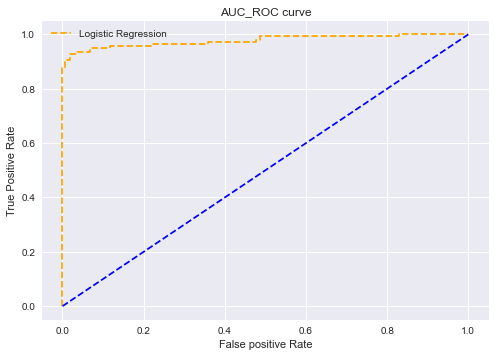

In [9]:
plt.style.use('seaborn')
plt.plot(fpr , tpr, linestyle = '--', color='orange', label = 'Logistic Regression')
plt.plot(p_fpr,p_tpr, linestyle='--', color='blue')

# title
plt.title('AUC_ROC curve')
# x label
plt.xlabel('False positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [15]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       164
           1       0.96      0.93      0.94       136

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[159   5]
 [ 10 126]]
